In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
ROOT_DIR = '/content/gdrive/MyDrive/OpentronsSAM2/data'

In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.8/871.8 kB 48.6 MB/s eta 0:00:00


In [4]:
import os
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.pt")  # finetune yolo

# Use the model
# Verify the path to your YAML file
data_yaml = os.path.join(ROOT_DIR, "google_colab_config.yaml")
# Print the contents of the file to check for errors
!cat {data_yaml}

# Ensure the file exists and is in the correct format
if os.path.exists(data_yaml):
  results = model.train(data=data_yaml, epochs=50, augment=True, device="mps", name="labelVersion", cos_lr=True, lr0=0.001, lrf=0.0001, cls=0.6, dfl=2.0)  # train the model
else:
  print(f"Error: YAML file not found at {data_yaml}")

100%|██████████| 6.25M/6.25M [00:00<00:00, 336MB/s]


path: '/content/gdrive/My Drive/OpentronsSAM2/data' 
train: images/train  # train images (relative to 'path')
val: images/train  # val images (relative to 'path')

# Classes
names:
  0: biorad_96_wellplate_200ul_pcr
  1: opentrons_96_filtertiprack_20ul
  2: pipette
  3: corning_384_wellplate_112ul_flat
  4: tip
Ultralytics YOLOv8.2.91 🚀 Python-3.10.12 torch-2.4.0+cu121 CPU (AMD EPYC 7B12)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/gdrive/MyDrive/OpentronsSAM2/data/google_colab_config.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=mps, workers=8, project=None, name=labelVersion, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, sa

100%|██████████| 755k/755k [00:00<00:00, 62.3MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/gdrive/My Drive/OpentronsSAM2/data/labels/train.cache... 115 images, 0 backgrounds, 1 corrupt: 100%|██████████| 116/116 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/gdrive/My Drive/OpentronsSAM2/data/images/train/tip3.png: ignoring corrupt image/label: image size (9, 9) <10 pixels


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/gdrive/My Drive/OpentronsSAM2/data/labels/train.cache... 115 images, 0 backgrounds, 1 corrupt: 100%|██████████| 116/116 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/gdrive/My Drive/OpentronsSAM2/data/images/train/tip3.png: ignoring corrupt image/label: image size (9, 9) <10 pixels


Plotting labels to runs/detect/labelVersion/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/labelVersion
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      0.584      3.901      1.586         12        640: 100%|██████████| 8/8 [00:48<00:00,  6.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.69s/it]

                   all        115        115    0.00382          1      0.145      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G     0.2651       3.41      1.352         12        640: 100%|██████████| 8/8 [00:18<00:00,  2.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.12s/it]

                   all        115        115    0.00621          1      0.356      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G     0.2568       2.54      1.329         12        640: 100%|██████████| 8/8 [00:18<00:00,  2.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.56s/it]

                   all        115        115     0.0165          1      0.398      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G     0.2086      1.833      1.221          9        640: 100%|██████████| 8/8 [00:19<00:00,  2.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.56s/it]

                   all        115        115      0.023      0.996      0.417       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      0.232      1.454      1.267         10        640: 100%|██████████| 8/8 [00:18<00:00,  2.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.50s/it]

                   all        115        115          1      0.133      0.733      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G     0.2142      1.211      1.246         12        640: 100%|██████████| 8/8 [00:18<00:00,  2.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.58s/it]

                   all        115        115      0.722       0.96      0.858      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      0.262      1.124      1.326          8        640: 100%|██████████| 8/8 [00:18<00:00,  2.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.54s/it]

                   all        115        115      0.676      0.928      0.904      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G     0.2242      1.104      1.242          7        640: 100%|██████████| 8/8 [00:18<00:00,  2.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.53s/it]

                   all        115        115      0.746      0.961      0.897      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G     0.2072     0.9917      1.214         12        640: 100%|██████████| 8/8 [00:18<00:00,  2.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.50s/it]

                   all        115        115      0.918      0.979      0.995      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G     0.2177      1.025      1.232         11        640: 100%|██████████| 8/8 [00:18<00:00,  2.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.54s/it]

                   all        115        115      0.933      0.986      0.995      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G     0.2015     0.9114      1.221         10        640: 100%|██████████| 8/8 [00:18<00:00,  2.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.55s/it]

                   all        115        115      0.953      0.984      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G     0.1967     0.9098      1.221         12        640: 100%|██████████| 8/8 [00:18<00:00,  2.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.51s/it]

                   all        115        115       0.86      0.831      0.869      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      0.184     0.8333      1.219         12        640: 100%|██████████| 8/8 [00:18<00:00,  2.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.53s/it]

                   all        115        115      0.739      0.836      0.903      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G     0.2132     0.9437       1.26          6        640: 100%|██████████| 8/8 [00:18<00:00,  2.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.51s/it]

                   all        115        115      0.449      0.785      0.823      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      0.189     0.8541      1.219         10        640: 100%|██████████| 8/8 [00:18<00:00,  2.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.53s/it]

                   all        115        115      0.762      0.762      0.733      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G     0.2009     0.9098      1.226         11        640: 100%|██████████| 8/8 [00:18<00:00,  2.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.52s/it]

                   all        115        115      0.885      0.962      0.964       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      0.191     0.8357      1.243          8        640: 100%|██████████| 8/8 [00:18<00:00,  2.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.53s/it]

                   all        115        115      0.811      0.983      0.982      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G     0.1693      0.808      1.196         10        640: 100%|██████████| 8/8 [00:18<00:00,  2.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.56s/it]

                   all        115        115      0.975          1      0.995      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G     0.1874     0.7874      1.204         11        640: 100%|██████████| 8/8 [00:18<00:00,  2.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.56s/it]

                   all        115        115      0.985      0.971      0.992      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G     0.1991     0.8571      1.227          9        640: 100%|██████████| 8/8 [00:18<00:00,  2.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.55s/it]

                   all        115        115      0.972          1      0.995      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G     0.1781     0.7183      1.235         10        640: 100%|██████████| 8/8 [00:18<00:00,  2.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.53s/it]

                   all        115        115      0.934      0.998      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G     0.1805     0.7121      1.194         12        640: 100%|██████████| 8/8 [00:18<00:00,  2.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.53s/it]

                   all        115        115      0.982          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G     0.1538     0.6798      1.208         10        640: 100%|██████████| 8/8 [00:18<00:00,  2.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.54s/it]

                   all        115        115      0.941          1      0.985      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G     0.1829      0.782      1.207          8        640: 100%|██████████| 8/8 [00:18<00:00,  2.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.53s/it]

                   all        115        115      0.845      0.997      0.982      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G     0.1567     0.7049      1.199         10        640: 100%|██████████| 8/8 [00:18<00:00,  2.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.52s/it]

                   all        115        115      0.793      0.958       0.99      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G     0.1415     0.6453      1.153         10        640: 100%|██████████| 8/8 [00:18<00:00,  2.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.55s/it]

                   all        115        115      0.821       0.94      0.979      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G     0.1736     0.7605      1.196          8        640: 100%|██████████| 8/8 [00:18<00:00,  2.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.54s/it]

                   all        115        115      0.981          1      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G     0.1611     0.6731      1.193         11        640: 100%|██████████| 8/8 [00:18<00:00,  2.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.52s/it]

                   all        115        115      0.968          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G     0.1386     0.6589      1.194         10        640: 100%|██████████| 8/8 [00:18<00:00,  2.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.55s/it]

                   all        115        115      0.854      0.989      0.953      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G     0.1356     0.6516      1.211         12        640: 100%|██████████| 8/8 [00:18<00:00,  2.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.56s/it]

                   all        115        115      0.852      0.985      0.993      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      0.118      0.613      1.194         11        640: 100%|██████████| 8/8 [00:18<00:00,  2.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.54s/it]

                   all        115        115      0.889      0.983      0.989      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G     0.1228     0.6168      1.173         12        640: 100%|██████████| 8/8 [00:18<00:00,  2.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.57s/it]

                   all        115        115       0.86       0.92      0.932      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G     0.1215     0.6826      1.169         11        640: 100%|██████████| 8/8 [00:18<00:00,  2.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.52s/it]

                   all        115        115      0.834      0.982      0.856      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G     0.1323     0.6318      1.171         12        640: 100%|██████████| 8/8 [00:18<00:00,  2.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.56s/it]

                   all        115        115      0.844      0.981      0.924      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G     0.1169     0.6034      1.169         10        640: 100%|██████████| 8/8 [00:18<00:00,  2.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.55s/it]

                   all        115        115      0.923      0.981      0.984      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G     0.1271      0.603      1.178         10        640: 100%|██████████| 8/8 [00:18<00:00,  2.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.55s/it]

                   all        115        115      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G    0.09171     0.5178      1.167         11        640: 100%|██████████| 8/8 [00:18<00:00,  2.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.55s/it]

                   all        115        115      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.1054     0.5498      1.198          8        640: 100%|██████████| 8/8 [00:18<00:00,  2.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.54s/it]

                   all        115        115      0.995          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G    0.09713     0.5188      1.184          9        640: 100%|██████████| 8/8 [00:18<00:00,  2.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.55s/it]

                   all        115        115      0.992          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.1039     0.5738      1.189          7        640: 100%|██████████| 8/8 [00:18<00:00,  2.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.56s/it]

                   all        115        115      0.993          1      0.995      0.995


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.2544      2.603      1.416          3        640: 100%|██████████| 8/8 [00:18<00:00,  2.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.56s/it]

                   all        115        115      0.995          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G       0.18      1.921      1.326          3        640: 100%|██████████| 8/8 [00:18<00:00,  2.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.53s/it]

                   all        115        115      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.1106      1.395      1.151          3        640: 100%|██████████| 8/8 [00:18<00:00,  2.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.53s/it]

                   all        115        115      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G       0.12      1.219       1.18          3        640: 100%|██████████| 8/8 [00:18<00:00,  2.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.57s/it]

                   all        115        115      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G    0.09794       1.31      1.137          3        640: 100%|██████████| 8/8 [00:18<00:00,  2.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.56s/it]

                   all        115        115      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G    0.08882     0.9705      1.178          3        640: 100%|██████████| 8/8 [00:18<00:00,  2.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.57s/it]

                   all        115        115      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G    0.08041     0.9715      1.161          3        640: 100%|██████████| 8/8 [00:18<00:00,  2.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.50s/it]

                   all        115        115      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G    0.08572     0.9197      1.178          3        640: 100%|██████████| 8/8 [00:17<00:00,  2.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.50s/it]

                   all        115        115      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.1037      1.142      1.154          3        640: 100%|██████████| 8/8 [00:18<00:00,  2.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.51s/it]

                   all        115        115      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G    0.09281     0.9441      1.167          3        640: 100%|██████████| 8/8 [00:19<00:00,  2.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.51s/it]

                   all        115        115      0.996          1      0.995      0.995



50 epochs completed in 0.359 hours.
Optimizer stripped from runs/detect/labelVersion/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/labelVersion/weights/best.pt, 6.3MB

Validating runs/detect/labelVersion/weights/best.pt...
Ultralytics YOLOv8.2.91 🚀 Python-3.10.12 torch-2.4.0+cu121 CPU (AMD EPYC 7B12)
Model summary (fused): 168 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:12<00:00,  3.01s/it]


                   all        115        115      0.996          1      0.995      0.995
biorad_96_wellplate_200ul_pcr         26         26      0.998          1      0.995      0.995
opentrons_96_filtertiprack_20ul         53         53      0.999          1      0.995      0.995
               pipette         10         10      0.994          1      0.995      0.995
corning_384_wellplate_112ul_flat         13         13      0.995          1      0.995      0.995
                   tip         13         13      0.992          1      0.995      0.995
Speed: 0.3ms preprocess, 82.0ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/labelVersion


In [ ]:
#run already finetuned model
import os
from ultralytics import YOLO
model_path = os.path.join(ROOT_DIR, '0.001LR50EpochsModel/weights/best.pt')
model = YOLO(model_path)

In [5]:
import shutil

In [6]:
source = '/content/runs/detect/labelVersion'
destination = '/content/gdrive/My Drive/OpentronsSAM2/data/0.001LR50EpochsYOLOSAM2Model'

In [7]:
shutil.copytree(source, destination, dirs_exist_ok=True)

'/content/gdrive/My Drive/OpentronsSAM2/data/0.001LR50EpochsYOLOSAM2Model'


0: 640x640 1 biorad_96_wellplate_200ul_pcr, 117.0ms
1: 640x640 1 corning_384_wellplate_112ul_flat, 117.0ms
2: 640x640 1 pipette, 117.0ms
3: 640x640 1 tip, 117.0ms
4: 640x640 1 opentrons_96_filtertiprack_20ul, 117.0ms
Speed: 1.5ms preprocess, 117.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


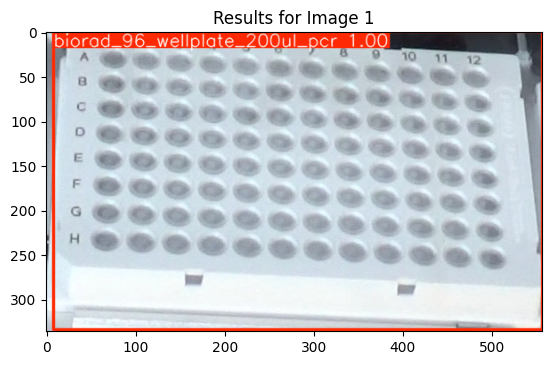

protocol.load_labware(biorad_96_wellplate_200ul_pcr, -1)




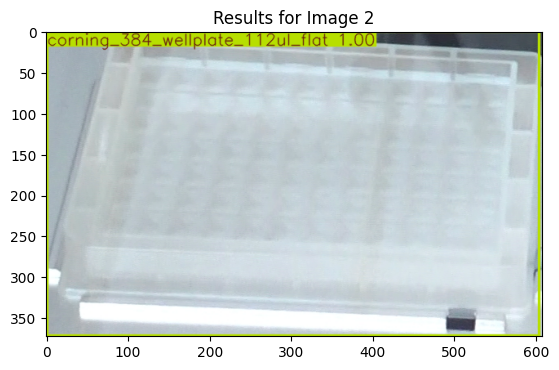

protocol.load_labware(corning_384_wellplate_112ul_flat, -1)




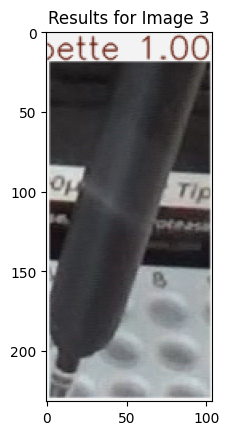

protocol.load_labware(pipette, -1)




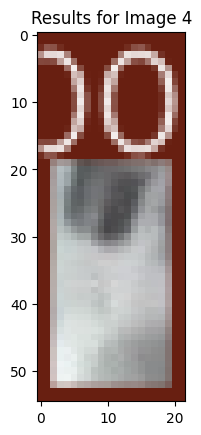

protocol.load_labware(tip, -1)




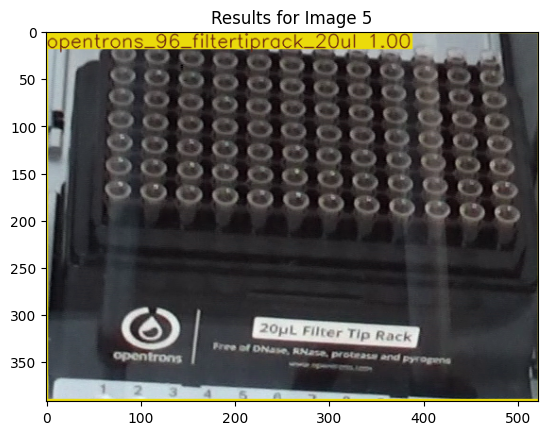

protocol.load_labware(opentrons_96_filtertiprack_20ul, -1)




In [8]:
import matplotlib.pyplot as plt

imgList = ["/content/bioRadWellplate19.png", "/content/nestWellplate4.png", "/content/pipette3.png", "/content/tip5.png", "/content/tiprack61.png"]
results = model.predict(imgList, agnostic_nms = True)  # results list

# View results
names = model.names

for idx, r in enumerate(results):
    # generate image
    annotated_image = r.plot()
    plt.imshow(annotated_image)
    plt.title(f"Results for Image {idx + 1}")
    plt.show()

    labwareNames = []
    for idx, c in enumerate(r.boxes.cls):
        labware = str(names[int(c)])
        labwareNames += [labware]
    #find deck slot
    for idx in range(len(r.boxes)):
         print(f"protocol.load_labware({labwareNames[idx]})")


    print("\n")


